Epoch 0, Loss: 0.15431337515943885
Epoch 100, Loss: 0.13043301258712173
Epoch 200, Loss: 0.10202489427129101
Epoch 300, Loss: 0.07372782551574522
Epoch 400, Loss: 0.04962370747028114
Epoch 500, Loss: 0.03143147184220118
Epoch 600, Loss: 0.018899229768218714
Epoch 700, Loss: 0.010792373562243876
Epoch 800, Loss: 0.005769403668068022
Epoch 900, Loss: 0.0027920553100150756
Training complete!
Updated weights and biases:
Weights Input-Hidden:
 [[-0.02858844  1.3926728   0.30935211  0.60679149]
 [-0.26169933  0.67086586 -0.36985379  1.14405614]]
Biases Hidden:
 [[-0.41388441  0.49369738 -0.42671598  0.08203832]]
Weights Hidden-Output:
 [[ 0.18582486  0.9214477 ]
 [-0.50239567  1.23916841]
 [ 0.42002669  0.42378537]
 [-0.30493207  0.44191564]]
Biases Output:
 [[-0.48550177  0.26036566]]


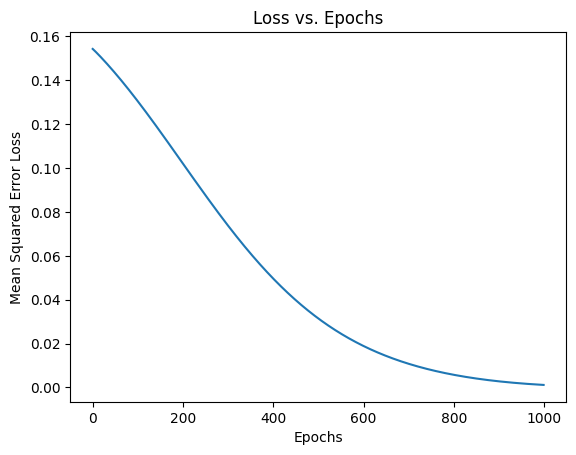

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Function to calculate the output of the neural network
def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = 1 / (1 + np.exp(-output_layer_input))  # Sigmoid activation function

    return hidden_layer_output, predicted_output

# Function to calculate the mean squared error loss
def calculate_loss(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Function to perform batch Adadelta optimization
def adadelta(X, Y, rho, epsilon, epochs):
    input_size = X.shape[1]
    hidden_size = 4  # You can adjust the number of hidden units
    output_size = Y.shape[1]

    # Initialize parameters
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize accumulated gradients and updates
    accumulated_gradient_weights_input_hidden = np.zeros_like(weights_input_hidden)
    accumulated_gradient_biases_hidden = np.zeros_like(biases_hidden)
    accumulated_gradient_weights_hidden_output = np.zeros_like(weights_hidden_output)
    accumulated_gradient_biases_output = np.zeros_like(biases_output)

    accumulated_update_weights_input_hidden = np.zeros_like(weights_input_hidden)
    accumulated_update_biases_hidden = np.zeros_like(biases_hidden)
    accumulated_update_weights_hidden_output = np.zeros_like(weights_hidden_output)
    accumulated_update_biases_output = np.zeros_like(biases_output)

    # Store loss and accuracy for plotting
    losses = []

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_output, predicted_output = forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

        # Backpropagation
        error = Y - predicted_output
        output_delta = error * (predicted_output * (1 - predicted_output))
        hidden_layer_delta = output_delta.dot(weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

        # Calculate gradients
        gradient_weights_input_hidden = X.T.dot(hidden_layer_delta)
        gradient_biases_hidden = np.sum(hidden_layer_delta, axis=0, keepdims=True)
        gradient_weights_hidden_output = hidden_layer_output.T.dot(output_delta)
        gradient_biases_output = np.sum(output_delta, axis=0, keepdims=True)

        # Update accumulated gradients
        accumulated_gradient_weights_input_hidden = rho * accumulated_gradient_weights_input_hidden + (1 - rho) * gradient_weights_input_hidden**2
        accumulated_gradient_biases_hidden = rho * accumulated_gradient_biases_hidden + (1 - rho) * gradient_biases_hidden**2
        accumulated_gradient_weights_hidden_output = rho * accumulated_gradient_weights_hidden_output + (1 - rho) * gradient_weights_hidden_output**2
        accumulated_gradient_biases_output = rho * accumulated_gradient_biases_output + (1 - rho) * gradient_biases_output**2

        # Calculate updates
        update_weights_input_hidden = np.sqrt(accumulated_update_weights_input_hidden + epsilon) / np.sqrt(accumulated_gradient_weights_input_hidden + epsilon) * gradient_weights_input_hidden
        update_biases_hidden = np.sqrt(accumulated_update_biases_hidden + epsilon) / np.sqrt(accumulated_gradient_biases_hidden + epsilon) * gradient_biases_hidden
        update_weights_hidden_output = np.sqrt(accumulated_update_weights_hidden_output + epsilon) / np.sqrt(accumulated_gradient_weights_hidden_output + epsilon) * gradient_weights_hidden_output
        update_biases_output = np.sqrt(accumulated_update_biases_output + epsilon) / np.sqrt(accumulated_gradient_biases_output + epsilon) * gradient_biases_output

        # Update parameters
        weights_input_hidden += update_weights_input_hidden
        biases_hidden += update_biases_hidden
        weights_hidden_output += update_weights_hidden_output
        biases_output += update_biases_output

        # Update accumulated updates
        accumulated_update_weights_input_hidden = rho * accumulated_update_weights_input_hidden + (1 - rho) * update_weights_input_hidden**2
        accumulated_update_biases_hidden = rho * accumulated_update_biases_hidden + (1 - rho) * update_biases_hidden**2
        accumulated_update_weights_hidden_output = rho * accumulated_update_weights_hidden_output + (1 - rho) * update_weights_hidden_output**2
        accumulated_update_biases_output = rho * accumulated_update_biases_output + (1 - rho) * update_biases_output**2

        # Calculate and store loss for each epoch
        loss = calculate_loss(Y, predicted_output)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    print("Training complete!")

    # Display updated weights and biases
    print("Updated weights and biases:")
    print("Weights Input-Hidden:\n", weights_input_hidden)
    print("Biases Hidden:\n", biases_hidden)
    print("Weights Hidden-Output:\n", weights_hidden_output)
    print("Biases Output:\n", biases_output)

    # Plot loss w.r.t. epoch
    plt.plot(range(epochs), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')
    plt.title('Loss vs. Epochs')
    plt.show()

# Dataset
X = np.array([[0.5, 2.5]])
Y = np.array([[0.2, 0.9]])

# Hyperparameters
rho = 0.9
epsilon = 1e-8
epochs = 1000

# Perform Adadelta optimization
adadelta(X, Y, rho, epsilon, epochs)
